In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns
import json

In [3]:
#!pip install cdlib

  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9394 sha256=3079db39736395125dc64fe83f472d43631835a645ed685542ef74ee2c4b2bde
  Stored in directory: c:\users\marco\appdata\local\pip\cache\wheels\af\40\91\ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395105 sha256=8f27c20ea6ff1ce0023377d9ac2dc0b8b936b1d642ca08cd29251e7ef4ec5dd7
  Stored in directory: c:\users\marco\appdata\local\pip\cache\wheels\dc\25\8b\072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
  Created wheel for python-igraph: filename=python_igraph-0.9.11-py3-none-any.whl size=9060 sha256=b52662c77f53d5001c6e478d1b79c9408039cd728ebaf0d62a2081b2683cd530
  Stored in directory: c:\users\marco\appdata\local\pip\cache\wheels\80\cc\db\88e7da87ff0cc3d1f311760bdaea8d531c2b209ec19dfda13c
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp38-cp38-win_amd64.whl size=83783 sha256=1

In [4]:
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'karateclub', 'wurlitzer', 'graph_tool', 'infomap'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'leidenalg'}


In [5]:
path_subgraph = "../DataSet SuperUsers/Graph_data/"

In [6]:
def plot_centralities(first, name_f, second, name_s, third, name_t, n):

    lista = [(k, v) for k, v in first.items()]
    lista.sort(key=lambda x: x[1], reverse = True)
    tops = lista[:n]
    first_ = []
    second_ = []
    third_ = []
    for i in tops:
        first_.append(first[i[0]])
        second_.append(second[i[0]])
        third_.append(third[i[0]])
        
    tops = [i for i,j in tops]
    tops = tops[::-1]
    first_ = first_[::-1]
    second_ = second_[::-1]
    third_ = third_[::-1]
    
    fig = plt.figure(figsize = (25,8), dpi = 300)

    fontsize = 17
    plt.rcParams.update({'font.size': fontsize})
    ax = fig.add_subplot(151)
    plt.barh(tops,first_, color = "#31A894")
    plt.grid(axis = 'both', alpha = .3)
    plt.xlabel(name_f)

    ax2 = fig.add_subplot(152)
    plt.barh(tops,second_, color = "#315FA8")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax2.get_yticklabels(), visible = False)
    plt.xlabel(name_s)

    ax3 = fig.add_subplot(153)
    plt.barh(tops,third_, color = "#5D2FA5")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax3.get_yticklabels(), visible = False)
    plt.xlabel(name_t)
    plt.show()

In [7]:
path_graph = "../DataSet SuperUsers/Graph_data/"

In [8]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [9]:
ba_G = nx.read_graphml(path_graph+"BA_Network.graphml")
er_G = nx.read_graphml(path_graph+"ER_Network.graphml")
ws_G = nx.read_graphml(path_graph+"WS_Network.graphml")
cm_G = nx.read_graphml(path_graph+"CM_Network.graphml")

In [10]:
models = {
    "Real Network": G,
    "Barabasi Albert": ba_G,
    "Erdos Renyi": er_G,
    "Watts Strogatz": ws_G,
    "Configuration Model": cm_G
}

# 1 - Degree Centrality

In [11]:
degree_centrality = nx.degree_centrality(G)

In [12]:
new_centrality_nodes = [k for k, v in sorted(degree_centrality.items(), key=lambda item: item[1], reverse = True)]
new_df = pd.DataFrame({"Id": new_centrality_nodes})
new_df.to_csv("../DataSet SuperUsers/centrality_degree_nodes.csv", index=False)

# 2 - Connectivity Based Centrality

In [13]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight='Count',  max_iter=1000)

# 3 - PageRank centrality

In [14]:
pagerank_centrality = nx.pagerank(G, weight='Count', max_iter=1000)

In [15]:
nx.pagerank??

# 4 - Geometric Centrality

In [16]:
closeness_centrality = nx.closeness_centrality(G)

In [17]:
harmonic_centrality = nx.harmonic_centrality(G)

In [18]:
betweenness_centrality = nx.betweenness_centrality(G, weight='Count')

Plot

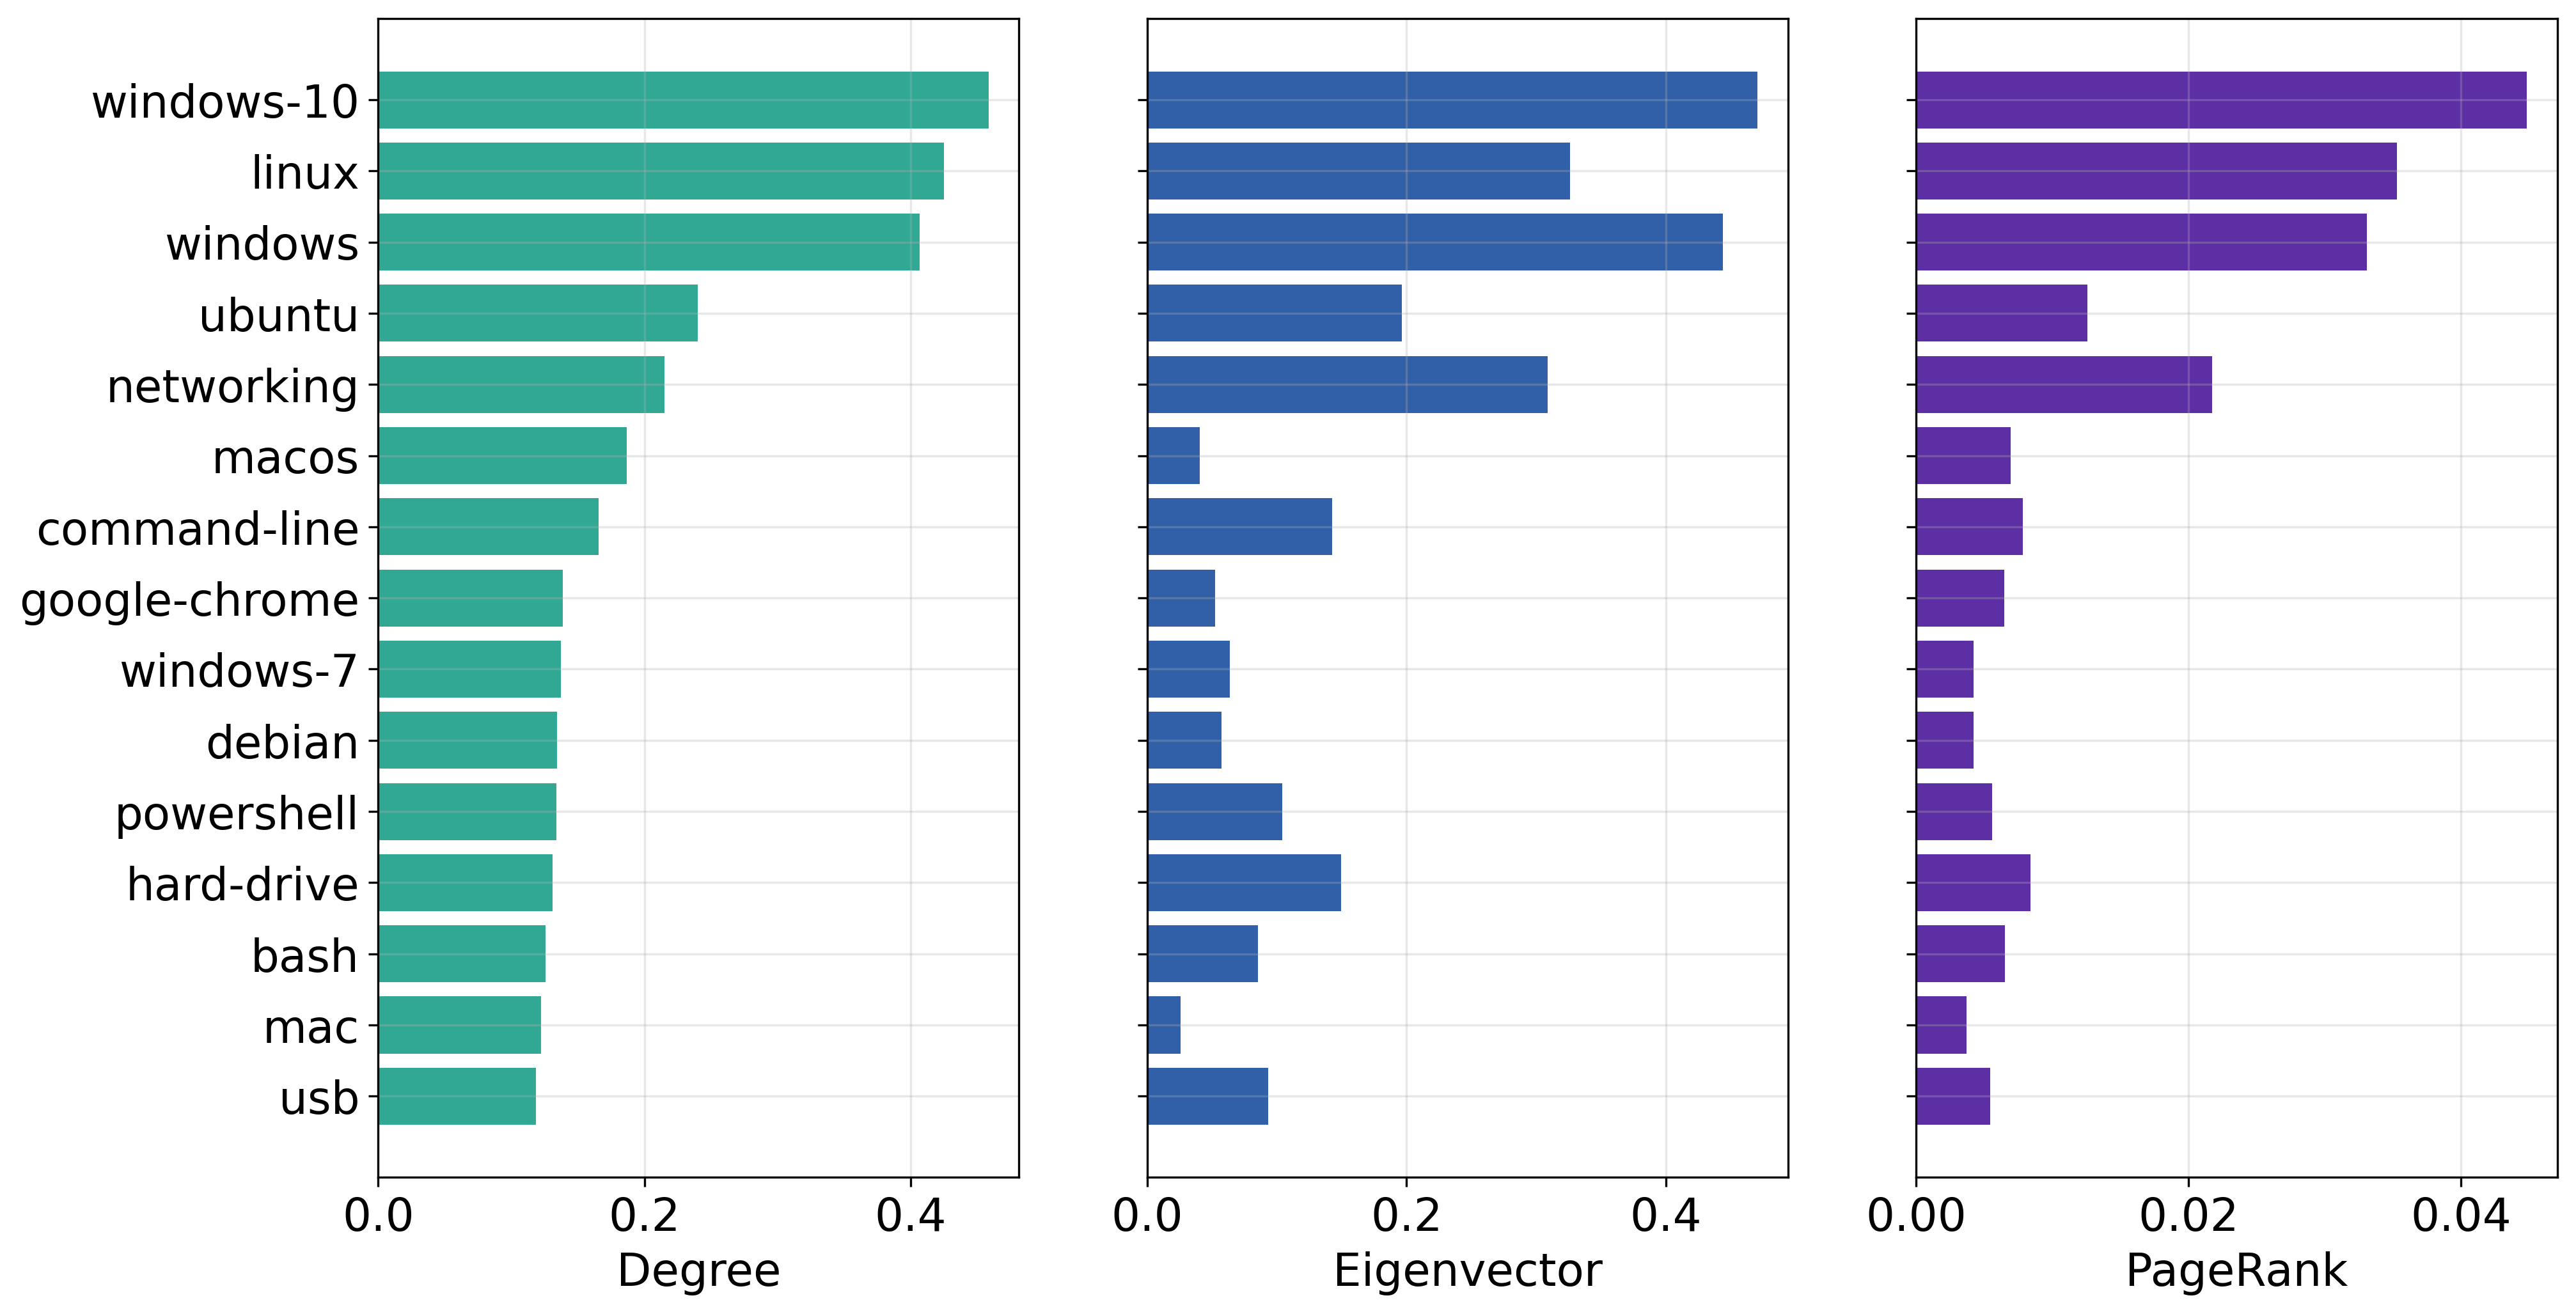

In [19]:
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

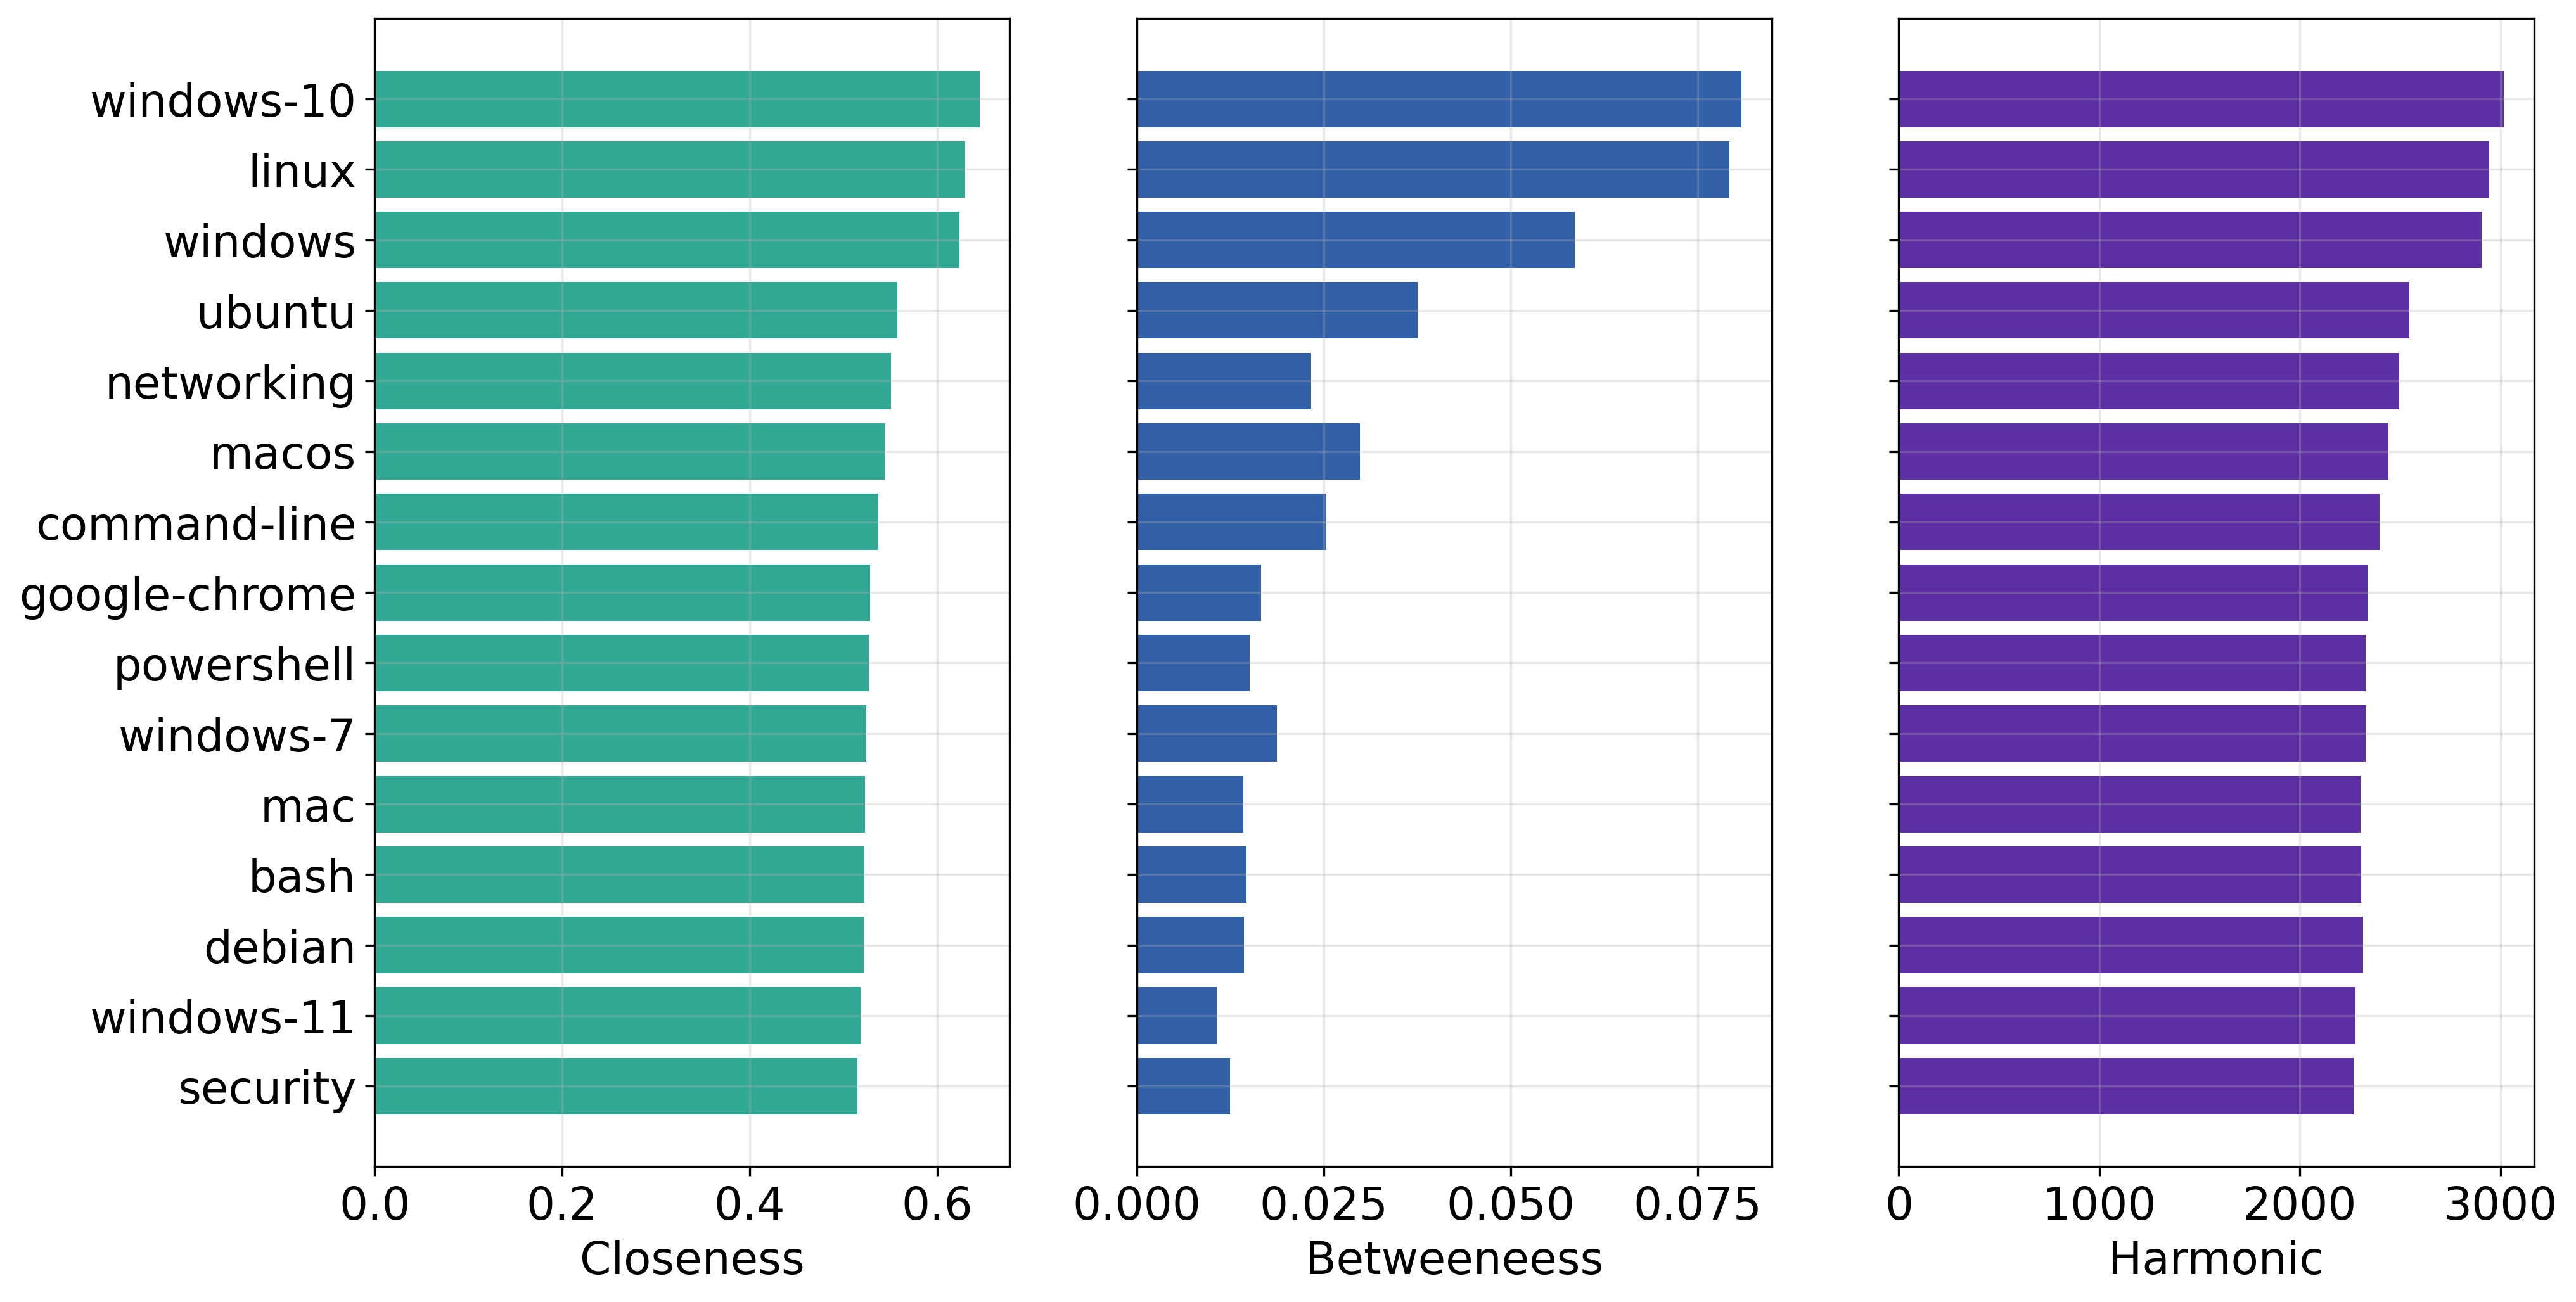

In [20]:
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)

In [21]:
lista = [(k, v) for k, v in degree_centrality.items()]
lista.sort(key=lambda x: x[1], reverse = True)
tops = lista[:20]
tops = [i for i,j in tops]
H = G.subgraph(tops)
nx.write_gexf(H, path_subgraph+"centrality_subgraph.gexf")

# Storing central nodes

In [22]:
betweenness_centrality

{'macos': 0.02987821051985213,
 'python': 0.009415779212613693,
 'zsh': 0.0015814326104902406,
 'compression': 0.0025886095984685668,
 'tar': 0.00025357597593975915,
 'crash': 0.002074946534880725,
 'windows-10': 0.0809078879631195,
 'memory': 0.010329908040582732,
 'docker': 0.007113062272232285,
 'windows': 0.058596792566548685,
 'uninstall': 0.0013677439942309652,
 'powershell': 0.01513201505184436,
 'command-line': 0.025388398400354922,
 '7-zip': 0.0008707192162252978,
 'gui': 0.0009244375560168128,
 'remote-desktop': 0.005751953090279823,
 'youtube': 0.0012419334317883817,
 'icons': 0.003006542971433595,
 'google-chrome': 0.016637858573137043,
 'security': 0.012438663095532794,
 'internet': 0.002487484302035386,
 'linux': 0.07928001742665039,
 'audio': 0.012903874901898453,
 'duplicate': 0.0008555402657934214,
 'dns': 0.005699231455017038,
 'firefox': 0.012629012572112262,
 'tabs': 0.0004273146567250204,
 'filesystems': 0.005949283331039644,
 'file-management': 0.00150116375788058

In [23]:
new_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse = True)}
new_centrality_nodes = [k for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse = True)]

# 5 - Assortativity

Weighted graph

In [28]:
d_weighted = nx.degree_assortativity_coefficient(G, weight = "Count")

KeyboardInterrupt: 

In [ ]:
d_weighted

In [ ]:
# Calcolo avg nearest neigh
## Compute the average degree connectivity of graph.
"""
The average degree connectivity is the average nearest neighbor degree of
    nodes with degree k. For weighted graphs, an analogous measure can
    be computed using the weighted average neighbors degree defined in
    [1]_, for a node `i`, as
"""
avg=nx.k_nearest_neighbors(G, weight = "Count")
y=list(avg.values())

# Calcolo vettore dei gradi
k=G.degree()
x=[]
for item in k:
    x.append(item[1])
    
output = []
for b in x:
       if b not in output:
            output.append(b)

# Plot
plt.plot(output,y,'b.')   
plt.xlabel('Degree k')
plt.ylabel('KNN(k)')

In [ ]:
d=nx.degree_assortativity_coefficient(G)

In [ ]:
d

In [ ]:
# Calcolo avg nearest neigh
avg=nx.k_nearest_neighbors(G)
y=list(avg.values())

# Calcolo vettore dei gradi
k=G.degree()
x=[]
for item in k:
    x.append(item[1])
    
output = []
for b in x:
       if b not in output:
            output.append(b)

# Plot
plt.plot(output,y,'b.')   
plt.xlabel('Degree k')
plt.ylabel('KNN(k)')